# Regresion Logistica

En este codigo voy a estar aplicando regresion logistica sobre un dataset de emisiones de C02 en vehiculos, a fin de predecir el consumo de nuevos autos. 


In [12]:
# Instalamos las dependencias

!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3

# Importamos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

927.75s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


935.95s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


944.06s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


952.20s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


## Dataset

Como dije anteriormente este dataset es sobre vehiculos y en particular queremos tomar como variable objetivo las emisiones C02, descargamos entonces el dataset y vemos su esquema 


In [15]:
#Descargamos dataset
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"


#Leemos dataset
df=pd.read_csv(url)

### Esquema del Dataset

Veamos un poco el esquema del dataset con 3 samples

In [17]:
df.sample(3)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
842,2014,NISSAN,FRONTIER 4WD,PICKUP TRUCK - SMALL,4.0,6,A5,X,15.7,11.2,13.7,21,315
275,2014,CHRYSLER,200 CONVERTIBLE,COMPACT,2.4,4,A4,X,11.7,8.2,10.1,28,232
60,2014,AUDI,S6,MID-SIZE,4.0,8,A7,Z,14.2,9.7,12.2,23,281


Logicamente esto de por si solo sirve para visualizar un poco los datos que vamos a tener a nuestra disposicion, pero no podemos utilizarlos en estas condiciones, podemos entonces computar un analisis estadistico de la informacion 

In [19]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


### Evaluacion de relaciones

Tomemos entonces algunos features que -en principio- podrian influenciar las emisiones: Tamaño de motor, Cilindros, Consumo, Emisiones C02

In [20]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

Y veamos la distribucion de los valores de estos features para encontrar relaciones y patrones a primera vista

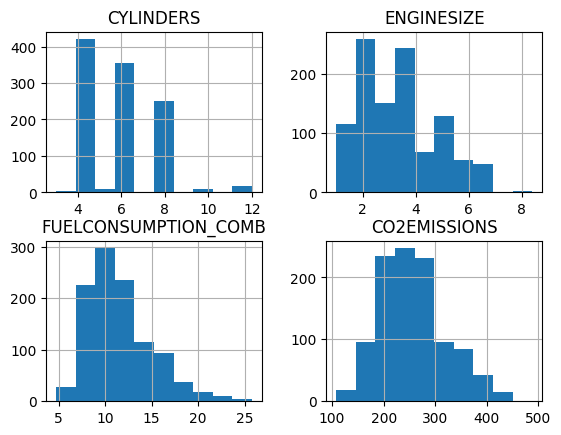

In [21]:
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

Es evidente que el consumo y las emisiones son bastante similares, podemos presentar esta informacion de otra manera planteando rectas relacionales con las emisiones

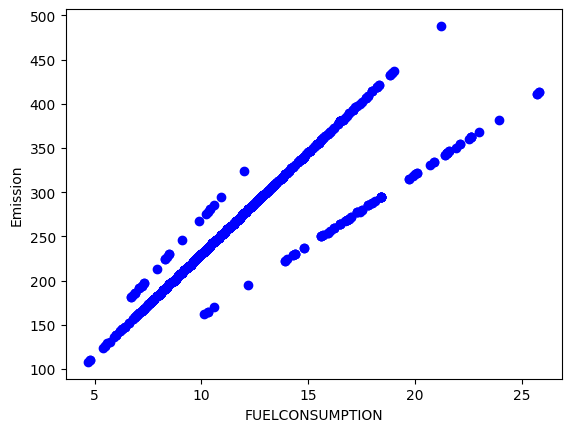

In [23]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION")
plt.ylabel("Emission")
plt.show()

**¿Eureka?**
Ahora, utilicemos esta variable como input feature para predecir las emisiones, extraigamos el input (fuel consumption) y objetivo (C02 emission), será que al tener tan fuerte relacion es util?

In [25]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

### Dataset grouping

Ahora separemos el dataset en un grupo de testeo y uno de entrenamiento, idealmente tendriamos que agarrar rangos del 20%-30% para testeo y el sobrante para entrenar a uestro modelo

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Armando el modelo
Ahora usando scikit armamos nuestro modelo de regresion lineal

In [27]:
from sklearn import linear_model

# Creamos el modelo
regressor = linear_model.LinearRegression()

# Entrenamos al modelo con nuestro grupo de entrenamiento (con un reshape por cuestiones tecnicas)
regressor.fit(X_train.reshape(-1, 1), y_train)


LinearRegression()

Text(0, 0.5, 'Emission')

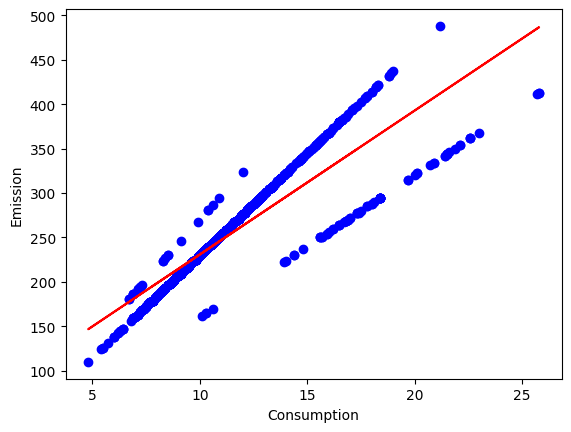

In [28]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Consumption")
plt.ylabel("Emission")

Evidentemente nuestro modelo esta lejos de ajustarse a la informacion de entrenamiento porque tenemos 3 lineas muy separadas que causan un acomodamiento que termina sin ajustarse correctamente a ninguna.

### Evaluacion

Comparemos valores predecidos con reales y utilicemos algunas métricas famosas para evaluar la precision del modelo, entre ellas: MSE, R2, MAE

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Usamos la funcion de prediccion con los datos de testeo
y_pred = regressor.predict(X_test.reshape(-1,1))

# Evaluamos
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("R2-score: %.2f" % r2_score(y_test, y_pred))

Mean absolute error: 20.44
Mean squared error: 797.43
R2-score: 0.81


### Conclusiones

Nuestro modelo parecería ser razonable, podemos ver que las metricas de evaluacion no arrojan resultados terriblemente malos y ciertamente encontramos una forma de predecir la tendencia de emisiones gracias al consumo. <br> En simultaneo tambien podemos argumentar que este modelo tiene un gran problema, **¿Que ocurre cuando nuestro consumo es alto pero el combustible es "ecológico"?** <br>Nuestro modelo desestima completamente un monton de otras variables que influyen fuertemente en lo que queremos predecir y podriamos arrojar valores altos para grandes consumidores de autos electricos vs valores bajos para poco consumo de nafta, en sitauciones como esta una mejora al modelo podria ser reemplazar nuestra Regresion Lineal por una Regresion Multiple.